## Peru Terrorism Categorical Analysis

This jupyter notebook completes various frequentist and Bayesian analysis on categorical data. It uses chi-square tests, likelihood estimates, 
odds ratios, Bayesian Contingency Table analysis and frequentist and Bayesian loglinear modelling

In [22]:
####################
####################
# Source Documents #
####################
####################

source("C:/R Portfolio/Categorical Analysis of Peru Terrorism/Functions 07 05 24.R")
source("C:/R Portfolio/Categorical Analysis of Peru Terrorism/Data_Objects.R")

All packages loaded successfully



In [17]:
########
########
# Peru #
########
########

Country_Name <- "Peru"
Peru_data <- Country_Prep(GTD_WD, Country_Name)

dim(Peru_data)
glimpse(Peru_data)

[1] 4272   14

Rows: 4,272
Columns: 14
$ Decade   <fct> 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1~
$ Year     <int> 1973, 1973, 1973, 1974, 1974, 1975, 1975, 1977, 1977, 1978, 1~
$ Quarter  <fct> ThirdQuarter, ThirdQuarter, ThirdQuarter, ThirdQuarter, Fourt~
$ Month    <int> 7, 7, 7, 9, 11, 4, 6, 6, 6, 8, 9, 12, 1, 7, 7, 7, 7, 7, 8, 8,~
$ Week     <fct> WeekOne, WeekFour, WeekFour, WeekThree, WeekThree, WeekTwo, W~
$ Day      <int> 4, 22, 22, 19, 21, 9, 8, 18, 18, 24, 3, 22, 25, 20, 28, 28, 2~
$ Dead     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0~
$ Lethal   <chr> "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "~
$ Group    <fct> OtherGroup, OtherGroup, OtherGroup, OtherGroup, OtherGroup, O~
$ Target   <fct> OtherTarget, OtherTarget, OtherTarget, OtherTarget, Business,~
$ Attack   <fct> BombAttack, BombAttack, BombAttack, BombAttack, BombAttack, O~
$ Weapon   <fct> Explosives, Explosives, Explosives, Explosives, Explosives, U~
$ Province <fct>

In [3]:
###################
# Variable Counts #
###################

Peru_data %>% 
  map(~count(data.frame(x=.x), x))

x,n
<fct>,<int>
1970,13
1980,2988
1990,1231
2000,17
2010,23
x,n
<int>,<int>
1973,3
1974,2


In [18]:
#############
# Save File #
#############

setwd("C:/R Portfolio/Categorical Analysis of Peru Terrorism") 
write.csv(Peru_data, file = "Peru_data.csv", row.names = F)
Peru_data <- read.csv("Peru_data.csv", fileEncoding="UTF-8")
glimpse(Peru_data)

Rows: 4,272
Columns: 14
$ Decade   <int> 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1~
$ Year     <int> 1973, 1973, 1973, 1974, 1974, 1975, 1975, 1977, 1977, 1978, 1~
$ Quarter  <chr> "ThirdQuarter", "ThirdQuarter", "ThirdQuarter", "ThirdQuarter~
$ Month    <int> 7, 7, 7, 9, 11, 4, 6, 6, 6, 8, 9, 12, 1, 7, 7, 7, 7, 7, 8, 8,~
$ Week     <chr> "WeekOne", "WeekFour", "WeekFour", "WeekThree", "WeekThree", ~
$ Day      <int> 4, 22, 22, 19, 21, 9, 8, 18, 18, 24, 3, 22, 25, 20, 28, 28, 2~
$ Dead     <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0~
$ Lethal   <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0~
$ Group    <chr> "OtherGroup", "OtherGroup", "OtherGroup", "OtherGroup", "Othe~
$ Target   <chr> "OtherTarget", "OtherTarget", "OtherTarget", "OtherTarget", "~
$ Attack   <chr> "BombAttack", "BombAttack", "BombAttack", "BombAttack", "Bomb~
$ Weapon   <chr> "Explosives", "Explosives", "Explosives", "Explosives", "Expl~
$ Province <chr>

In [19]:
####################
####################
# One Hot Encoding # 
####################
####################

# Automatically converts each variable category or level into separate variables #
# For instance, the province variable has several provinces listed within it. The one hot encoding technique converts each province into a separate new variable on its own, rather than being grouped with all other provinces under the variable headed province.
# The unique value in the function selects each unique value or level and converts it into a new variable on a binary basis, where 1 equals presence of the level in the new variable and zero equals its absence. For instance, if we take bomb attack as a new variable, then rows where bomb attack occurred will be coded 1, while attacks that featured another attack type will be coded zero in the bomb attack variable column.

library(recipes)

# Define the recipe
recipe_obj <- recipe(~ ., data = Peru_data) %>%
  step_dummy(all_nominal(), -all_outcomes())

# Prepare the recipe
recipe_prep <- prep(recipe_obj)

# Apply the prepared recipe
Peru_data_binary <- bake(recipe_prep, new_data = NULL)

# Glimpse the result
glimpse(Peru_data_binary)



Attaching package: 'recipes'


The following object is masked from 'package:Matrix':

    update


The following object is masked from 'package:stats':

    step


Warning message:
"There are new levels in a factor: NA"


Rows: 4,272
Columns: 30
$ Decade                 <int> 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970,~
$ Year                   <int> 1973, 1973, 1973, 1974, 1974, 1975, 1975, 1977,~
$ Month                  <int> 7, 7, 7, 9, 11, 4, 6, 6, 6, 8, 9, 12, 1, 7, 7, ~
$ Day                    <int> 4, 22, 22, 19, 21, 9, 8, 18, 18, 24, 3, 22, 25,~
$ Dead                   <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0,~
$ Lethal                 <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,~
$ Quarter_FourthQuarter  <dbl> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,~
$ Quarter_SecondQuarter  <dbl> 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,~
$ Quarter_ThirdQuarter   <dbl> 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,~
$ Week_WeekOne           <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,~
$ Week_WeekThree         <dbl> 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,~
$ Week_WeekTwo           <dbl> 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,~
$ Group_OtherGro

In [20]:
####################
# Data Exploration #
####################

# To get a sense of the data distribution, we can use 3 way frequency tables

# 3-Way Frequency Table
 
mytable <- xtabs(~ Group + Target + Attack, data = Peru_data)
str(mytable)
mytable

 'xtabs' int [1:3, 1:6, 1:4] 5 0 22 2 1 24 14 5 87 15 ...
 - attr(*, "dimnames")=List of 3
  ..$ Group : chr [1:3] "MRTA" "OtherGroup" "ShiningPath"
  ..$ Target: chr [1:6] "Business" "GovtGen" "OtherTarget" "Police" ...
  ..$ Attack: chr [1:4] "ArmedAssaultAttack" "Assassination" "BombAttack" "OtherAttack"
 - attr(*, "call")= language xtabs(formula = ~Group + Target + Attack, data = Peru_data)


, , Attack = ArmedAssaultAttack

             Target
Group         Business GovtGen OtherTarget Police Private Utilities
  MRTA               5       2          14     15      11         0
  OtherGroup         0       1           5      5       2         0
  ShiningPath       22      24          87    204     257         1

, , Attack = Assassination

             Target
Group         Business GovtGen OtherTarget Police Private Utilities
  MRTA               2       3           5      5       2         0
  OtherGroup         3      45          18     12       2         0
  ShiningPath       52     281          88    123     110         0

, , Attack = BombAttack

             Target
Group         Business GovtGen OtherTarget Police Private Utilities
  MRTA             168      59          76     11      33        10
  OtherGroup        17     111         122     30      23        63
  ShiningPath      496     307         264    154     193       348

, , Attack = OtherAttack

         

In [21]:
####################
# Chi Square Tests #
####################

# Shining Path group had the largest attack count and analysis of lethal terrorism is under researched in the wider literature.
# That is why such variables are included in the test.

LA_SP <- matrix(c(1194, 130, 1704, 757), ncol = 2, byrow = T)
colnames(LA_SP) <- c("Shining Path", "Other Group")
rownames(LA_SP) <- c("Lethal", "Non Fatal")
str(LA_SP)
LA_SP <- as.table(LA_SP)
LA_SP

 num [1:2, 1:2] 1194 1704 130 757
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:2] "Lethal" "Non Fatal"
  ..$ : chr [1:2] "Shining Path" "Other Group"


          Shining Path Other Group
Lethal            1194         130
Non Fatal         1704         757

In [3]:
gmodels::CrossTable(LA_SP, 
           prop.r = T, 
           prop.c = T,
           prop.t = T,
           prop.chisq = T, 
           chisq = T, 
           expected = T,
           fisher = T,
           mcnemar = T,
           resid = F, 
           sresid = T, 
           asresid = F,
           format = "SPSS"
)


   Cell Contents
|-------------------------|
|                   Count |
|         Expected Values |
| Chi-square contribution |
|             Row Percent |
|          Column Percent |
|           Total Percent |
|            Std Residual |
|-------------------------|

Total Observations in Table:  3785 

             |  
             | Shining Path  |  Other Group  |    Row Total | 
-------------|--------------|--------------|--------------|
      Lethal |        1194  |         130  |        1324  | 
             |    1013.726  |     310.274  |              | 
             |      32.059  |     104.742  |              | 
             |      90.181% |       9.819% |      34.980% | 
             |      41.201% |      14.656% |              | 
             |      31.546% |       3.435% |              | 
             |       5.662  |     -10.234  |              | 
-------------|--------------|--------------|--------------|
   Non Fatal |        1704  |         757  |        2461  | 
    

This is how to interpret the above output:
Cell Contents: This section indicates the content of each cell in the table. It includes the count of observations, expected values (based on certain assumptions), Chi-square contributions, row percentages, column percentages, total percentages, and standard residuals.
Total Observations in Table: This line tells you the total number of observations or cases in the dataset, which is 3785 in this case.
Table: The main body of the table displays the counts of observations in each cell, broken down by categories (in this case, "Shining Path" and "Other Group") and some criteria (in this case, "Lethal" and "Non Fatal"). The percentages are also provided, including row percentages (percentage within each row), column percentages (percentage within each column), and total percentages (percentage within the total).
Statistics for All Table Factors: This section provides the results of various statistical tests performed on the table.
Pearson's Chi-squared test: This test assesses whether there is a significant association between the rows and columns of the table.
Pearson's Chi-squared test with Yates' continuity correction: This is a variant of the Pearson's Chi-squared test that adjusts for continuity.
McNemar's Chi-squared test: This test is used when the data are paired (e.g., before and after measurements) to assess changes.
McNemar's Chi-squared test with continuity correction: This is a variant of McNemar's test that adjusts for continuity.
Fisher's Exact Test for Count Data: This test is used to determine if there are significant differences between two groups when the sample sizes are small. It calculates odds ratios and provides confidence intervals.
Minimum expected frequency: This value indicates the minimum expected frequency under certain assumptions.
Interpreting the results involves assessing the statistical significance of the tests (usually by comparing the p-values to a significance level, commonly 0.05), examining the effect sizes (e.g., Chi-square contributions, standard residuals), and considering the practical implications of any significant findings in the context of the research question or hypothesis.
It shows significant statistical association between lethality and group type.

In [5]:
###########
# Cramers V
###########

# This determines the strength of the relationship - known as effect size
# A common technique is cramers V - as found in the lsr package

# A Rule of Thumb to interpret cramers V output:

# Small or weak effect size: v = .1
# Medium or moderate effect size: v = .3
# Large or strong effect size: v = .5

library(lsr)
cramersV(LA_SP)

[1] 0.2351162

Cramer's V is a measure of association between categorical variables, similar to Pearson's correlation coefficient for continuous variables.
The value of Cramer's V ranges from 0 to 1, where 0 indicates no association and 1 indicates a perfect association.
A value closer to 1 suggests a stronger association between the variables, while a value closer to 0 suggests a weaker association.
In this case, the interpretation of Cramer's V statistic, which measures the association between these two categorical variables, suggests a moderate 
association. A Cramer's V value of approximately 0.235 indicates that there is a discernible but not particularly strong relationship between the 
severity of the outcome (lethal vs. non-fatal) and the group affiliation (Shining Path vs. Other Group).

In [7]:
##########################
# Likelihood and estimates
##########################

# The purpose is to estimate probability of lethal or non fatal attacks per cell using a contingency table

rowSums(LA_SP)
TR <- LA_SP/rowSums(LA_SP)
TR

# Likelihood of lethal attack by Shining Path. The difference with 100% is the probability of lethal attack by collective other group.

Lethal Non Fatal 
     1324      2461

          Shining Path Other Group
Lethal      0.90181269  0.09818731
Non Fatal   0.69240146  0.30759854

The above is a a table of conditional probabilities. Each cell represents the probability of a certain outcome given a specific group affiliation.

Interpretation:

For example, the probability of a lethal outcome given affiliation with the Shining Path group is approximately 0.9018, while the probability of a 
non-fatal outcome given affiliation with the Shining Path group is approximately 0.0982.
Similarly, the probability of a lethal outcome given affiliation with the Other Group is approximately 0.6924, while the probability of a non-fatal 
outcome given affiliation with the Other Group is approximately 0.3076.
These conditional probabilities can be useful for understanding the likelihood of outcomes within each group and can inform further analysis or 
decision-making processes.

In [9]:
#############
# Odds Ratios 
#############

# Odds are simply the probability of a success divided by the probability of a failure.

# The purpose is to estimate the odds ratio describing the relationship between lethal attack and Shining Path.

library(questionr)
odds.ratio(LA_SP)

OR.hat <- LA_SP[1,1] * LA_SP[2,2] / (LA_SP[2,1] * LA_SP[1,2])
round(OR.hat, 4) # the estimated odds of an attack by Shining Path resulting in fatalities is 4.0803 compared to the when the 
# attack results in zero fatalities.


,OR,2.5 %,97.5 %,p
,<dbl>,<dbl>,<dbl>,<dbl>
Fisher's test,4.079046,3.330979,5.023834,1.563844e-52


[1] 4.0803

Find the true odds ratio

The below code is designed to use statistics to find a range where we think the true odds ratio lies, given our data and how confident we want to be.
Setting the Significance Level (alpha):
alpha <- 0.02: We're deciding how confident we want to be in our results. Here, we're saying we want to be 98% confident. The smaller alpha is, the more confident we are, but we're also making it harder for our results to be considered significant.
Calculating Variance:
var.log.or <- 1/LA_SP[1,1] + 1/LA_SP[1,2] + 1/LA_SP[2,1] + 1/LA_SP[2,2]: This is figuring out how much the estimated odds ratio might vary. If it varies a lot, our confidence interval will be wider.
Calculating Confidence Intervals:
OR.CI <- exp(log(OR.hat) + qnorm(p = c(alpha/2, 1-alpha/2)) * sqrt(var.log.or)): This is the main part. We're finding the range where we're pretty sure the true odds ratio lies.
log(OR.hat) is taking the natural logarithm of our estimated odds ratio.
qnorm(p = c(alpha/2, 1-alpha/2)) is finding the "z-scores" that correspond to our confidence level. These scores help us find the range.
sqrt(var.log.or) is the standard error, showing how much the estimate might vary.
We add and subtract (multiply by) these values to the log of the odds ratio to find the range of values that are likely.
exp() turns our values back into regular odds ratios.
Rounding for Readability:
round(OR.CI, 2): This just makes our numbers look nicer by rounding them to two decimal places. It's easier to read this way.

In [11]:
alpha <- 0.02

var.log.or <- 1/LA_SP[1,1] + 1/LA_SP[1,2] + 1/LA_SP[2,1] + 1/LA_SP[2,2]
OR.CI <- exp(log(OR.hat) + qnorm(p = c(alpha/2, 1-alpha/2)) *
               sqrt(var.log.or))

round(OR.CI, 2)

[1] 3.22 5.17

Resulting confidence intervals:

The lower bound of the confidence interval is approximately 3.22.
The upper bound of the confidence interval is approximately 5.17.
These intervals tell us that we are 98% confident that the true odds ratio lies between approximately 3.22 and 5.17.

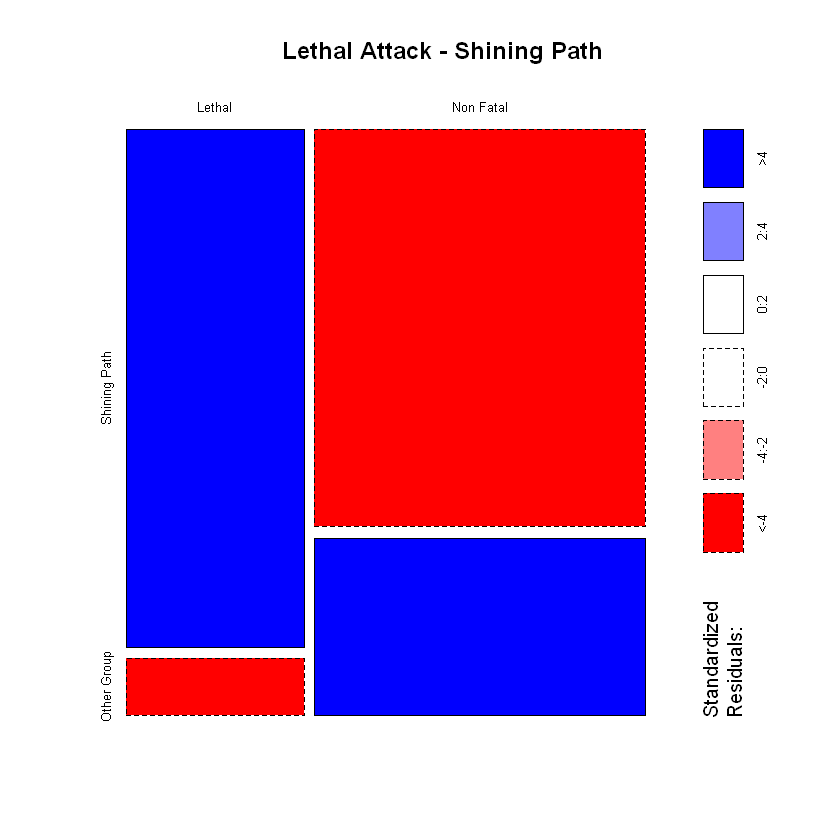

In [12]:
###################################
###################################
# Contingency Table Visualisation #
###################################
###################################

mosaicplot(LA_SP, 
           shade = T,
           main = "Lethal Attack - Shining Path")

The width of each column indicates the volume in that column compared to the other column
The volume of each cell in a particular column indicates th volume in that cell compared to the other cell in that particular column
Each cell is coloured on a sliding scale from dark blue to dark red. Dark blue indicates the count in that cell is much more than expected if there was no association between that pair of variables, while dark red indicates that the count is much less.
As evident, lethal attacks by Shining Path are much more than expected given independence, while non fatal attacks by Shining Path are much less than expected

In [23]:
#######################################
# Bayesian Contingency Table Analysis #
#######################################

contingencyTableBF(LA_SP, sampleType = "poisson", posterior = F)
# sampleType poisson is used because the column and or row totals are not fixed, as we would expect in an experiment where we might want 100 respondents
# There is no specific target for the number of observations or proportions assigned to different categories

Bayes factor analysis
--------------
[1] Non-indep. (a=1) : 2.899436e+49 ±0%

Against denominator:
  Null, independence, a = 1 
---
Bayes factor type: BFcontingencyTable, poisson



This output is from a Bayes factor analysis, specifically using the BFcontingencyTable method with a Poisson distribution. Bayes factors provide a measure of the strength of evidence for one hypothesis relative to another.

A Bayes factor of 
2.899436
𝑒
+
49
2.899436e+49 indicates extremely strong evidence in favor of the alternative hypothesis (Non-independence) compared to the null hypothesis (independence).
The "±0%" suggests that there is no uncertainty in the estimation of this Bayes factor, which is unusual and could be due to rounding or numerical precision issues.
In summary, the analysis strongly supports the hypothesis of non-independence between the variables being studied, with an overwhelming amount of evidence favoring this conclusion over the hypothesis of independence.
In other words, there is strong association between lethal attack and group type

## Loglinear Modelling

This section demonstrates Frequentist and Bayesian loglinear modelling

In [28]:
# We need to create a contigency table first. We can use the mytable as constructed earlier
DT <- write.ftable(ftable(mytable), file = "table.csv", quote = FALSE)
DT <- as.data.frame(DT)
str(DT)

'data.frame':	72 obs. of  4 variables:
 $ Group : Factor w/ 3 levels "MRTA","OtherGroup",..: 1 2 3 1 2 3 1 2 3 1 ...
 $ Target: Factor w/ 6 levels "Business","GovtGen",..: 1 1 1 2 2 2 3 3 3 4 ...
 $ Attack: Factor w/ 4 levels "ArmedAssaultAttack",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Freq  : int  5 0 22 2 1 24 14 5 87 15 ...


In [30]:
# Fit a saturated glm model
saturated_model <- glm(Freq ~ Group * Target * Attack, data = DT, family = poisson)

# Print the summary of the model
summary(saturated_model)


Call:
glm(formula = Freq ~ Group * Target * Attack, family = poisson, 
    data = DT)

Deviance Residuals: 
 [1]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[26]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[51]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

Coefficients:
                                                         Estimate Std. Error
(Intercept)                                             1.609e+00  4.472e-01
GroupOtherGroup                                        -2.591e+01  1.148e+05
GroupShiningPath                                        1.482e+00  4.954e-01
TargetGovtGen                                          -9.163e-01  8.367e-01
TargetOtherTarget                                       1.030e+00  5.210e-01
TargetPolice                                            1.099e+00  5.164e-01
TargetPrivate                                           7.885e-01  5.394e-01
TargetUtilities              

This is the interpretation of the above model output: 
Call: This line simply shows the function call used to fit the model.
Deviance Residuals: These are the residuals of the model. For a saturated model like this one, the residuals should all be zero, indicating a perfect fit to the data.
Coefficients: This table shows the estimated coefficients for each term in the model. Each coefficient represents the log of the expected count for a one-unit change in the predictor variable, holding all other variables constant. The Estimate column gives the estimated coefficients, while the Std. Error, z value, and Pr(>|z|) columns provide information about the uncertainty associated with each coefficient estimate.
Null deviance: This is the deviance of the model with only an intercept term (i.e., the null model). It represents how well the null model fits the data.
Residual deviance: This is the deviance of the fitted model. For a saturated model, the residual deviance should be close to zero, indicating a perfect fit to the data.
AIC: This is the Akaike Information Criterion, which is a measure of the relative quality of statistical models. Lower AIC values indicate better-fitting models.
Number of Fisher Scoring iterations: This indicates the number of iterations the algorithm took to converge to the maximum likelihood estimates of the model parameters.
Overall, the output suggests that the model fits the data perfectly (as expected for a saturated model), and the coefficients provide information about the relationship between the predictors and the expected count of the response variable. However, given the complexity of the model and the large number of coefficients, it may be challenging to interpret the specific effects of each predictor variable.

Bayesian Loglinear Modelling

In [33]:
install.packages("MCMCpack")

Installing package into 'C:/Users/Nicholas/Documents/R/win-library/4.1'
(as 'lib' is unspecified)




  There is a binary version available but the source version is later:
         binary source needs_compilation
MCMCpack  1.6-3  1.7-0              TRUE

  Binaries will be installed
package 'MCMCpack' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Nicholas\AppData\Local\Temp\RtmpGWdSCM\downloaded_packages


library(MCMCpack)
fitBayes <- MCMCpack::MCMCpoisson(Freq ~ Group * Attack, 
                                  family = poisson, data = DT)
summary(fitBayes)


The output is from a Bayesian Poisson regression model fitted to my data. 
Here's how to interpret the output:

Empirical mean and standard deviation: For each variable in the model, these values represent the estimated mean and standard deviation of the posterior distribution of the parameter. This provides an estimate of the average effect size and the variability around that estimate.
Naive standard error and time-series standard error: These values represent the standard error of the mean for each parameter estimate. The naive standard error is based solely on the sample variance, while the time-series standard error takes into account the autocorrelation structure of the MCMC chain.
Quantiles: These values provide information about the distribution of each parameter estimate. The 2.5% and 97.5% quantiles represent the lower and upper bounds of the 95% credible interval, respectively, while the 25%, 50% (median), and 75% quantiles represent the lower quartile, median, and upper quartile of the posterior distribution.
Interpretation: For example, let's interpret the coefficient for GroupOtherGroup. The empirical mean is -1.3372 with a standard deviation of 0.3213. This means that, on average, the log expected count of Freq is decreased by approximately 1.3372 when the observation belongs to the OtherGroup compared to the reference group (assuming all other variables in the model are held constant). The 95% credible interval ranges from approximately -2.0022 to -0.7568, indicating the plausible range of values for this effect with 95% confidence.
Similarly, you can interpret the other coefficients in a similar manner, considering their estimated means, standard deviations, and credible intervals. These provide insights into the effects of different variables and their interactions on the expected count of the response variable.